In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset

In [248]:
def load_data():
    x1 = []
    x2 = []
    classes = []
    line_counter = 0
    with open('tren_data1_06.txt') as f:
        for line in f:
            line = line.split()
            line_counter += 1
            
            x1.append(float(line[0]))
            x2.append(float(line[1]))
            classes.append(int(float(line[2])))
    
    X = np.array([[x1, x2] for x1, x2 in zip(x1, x2)])
    
    classes = np.array(classes)
    Y = np.ones(shape=(classes.shape[0], classes.max()))
    Y[np.arange(classes.shape[0]), classes-1] = -1
    Y = -Y

    return X.T, Y.T, classes

In [249]:
X, Y, classes = load_data()

print(X[:,0])
print(Y[:,0])

[ 4.0468461 -7.4922288]
[ 1. -1. -1. -1. -1.]


In [250]:
def plotPoints(X, classes):
    plt.figure(figsize=(10, 7))
    #X = np.array(X)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=classes)
    plt.title("Zobrazeni dat", fontsize=18)
    plt.show()

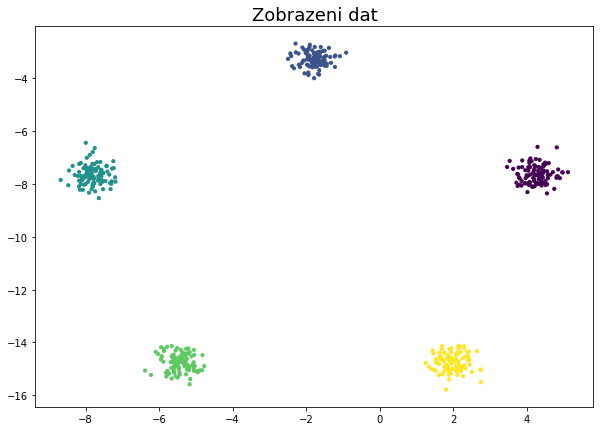

In [251]:
plotPoints(X.T, classes)

### Initialization

In [278]:
def initialize_parameters(n_x, n_y):
    """
    Argument:
    n_x - size of the input layer
    n_y - size of the output layer
    
    Returns:
    W - weight matrix of shape (n_y, n_x)
    b - bias vector of shape(n_y- 1)
    """
    
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y,1))
    
    return W, b

In [279]:
# parametry site
W, b = initialize_parameters(2, 5)
print(W.shape)
print(b.shape)
print(W)
print(b)

(5, 2)
(5, 1)
[[-0.00705414 -0.00474279]
 [-0.00408676 -0.0272891 ]
 [-0.00540773  0.00446482]
 [ 0.00024093  0.00349204]
 [ 0.01429236 -0.00453997]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Forward Propagation

In [290]:
def forward_propagation(x, W, b):
    """
    Argument:
    x - input data
    W - weights matrix
    b - bias vector
    
    Returns:
    a - The sigmoid output of the activation
    cache - a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    z = np.dot(W, x)
    z = np.reshape(z, (5,1)) + b
    
    # print(z)
    
    a = np.sign(z)
    
    # cache = (A, W, b)
    
    return a

In [281]:
a = forward_propagation(X[:,0], W, b)

[[ 0.00698708]
 [ 0.18791766]
 [-0.05533567]
 [-0.02518818]
 [ 0.09185345]]


In [282]:
print(a)
print(Y[:,0])

[[ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]]
[ 1. -1. -1. -1. -1.]


### Compute Cost

In [283]:
def compute_cost(a, y, E):
    
    y = np.reshape(y,(5,1))
    E = E + (1/2 * np.dot((a-y).T, (a-y)))
    
    return E

In [284]:
E = 0
E = compute_cost(a, Y[:,0], E)
print(np.squeeze(E))

4.0


### Backward propagation

In [285]:
def backward_propagation(a, y, x):
    
    y = np.reshape(y, (5,1))
    x = np.reshape(x, (2,1))
    
    dZ = y - a
    
    #print(dZ)
    
    dW = np.dot(dZ,x.T)
    
    #print(dW)
    
    db = dZ
    
    return dW, db

In [286]:
print(W)
print(a)
print(Y[:,0])
dW, db = backward_propagation(a, Y[:,0], X[:,0])
print(dW)
print(db)

[[-0.00705414 -0.00474279]
 [-0.00408676 -0.0272891 ]
 [-0.00540773  0.00446482]
 [ 0.00024093  0.00349204]
 [ 0.01429236 -0.00453997]]
[[ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]]
[ 1. -1. -1. -1. -1.]
[[ 0.         0.       ]
 [-8.0936922 14.9844576]
 [ 0.         0.       ]
 [ 0.         0.       ]
 [-8.0936922 14.9844576]]
[[ 0.]
 [-2.]
 [ 0.]
 [ 0.]
 [-2.]]


### Update parameters (backward propagation)

In [287]:
def update_parameters(W, b, dW, db, learning_rate):
    W = W + learning_rate * dW
    b = b + learning_rate * db
    return W, b

In [288]:
learning_rate = 0.1
print(W)
W, b = update_parameters(W, b, dW, db, learning_rate)
print(W)

[[-0.00705414 -0.00474279]
 [-0.00408676 -0.0272891 ]
 [-0.00540773  0.00446482]
 [ 0.00024093  0.00349204]
 [ 0.01429236 -0.00453997]]
[[-7.05413841e-03 -4.74279353e-03]
 [-8.13455982e-01  1.47115666e+00]
 [-5.40772922e-03  4.46481588e-03]
 [ 2.40926667e-04  3.49204195e-03]
 [-7.95076864e-01  1.49390579e+00]]


In [289]:
a = forward_propagation(X[:,0], W, b)
print(a)

[[ 6.98708178e-03]
 [-1.45141735e+01]
 [-5.53356700e-02]
 [-2.51881842e-02]
 [-1.46102377e+01]]
[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


# Model

In [310]:
def nn_model(X, Y, learning_rate, num_iterations, print_cost):
    
    W, b = initialize_parameters(2,5)
    print(W)
    print(b)
    # pocatecni chyba
    E = 0
    
    for i in range(0, num_iterations):
        
        for j in range(0, X.shape[1]):
                       
            a = forward_propagation(X[:,j], W, b)
            E = compute_cost(a, Y[:,j], E)
            dW, db = backward_propagation(a, Y[:,j], X[:,j])
            W, b = update_parameters(W, b, dW, db, learning_rate)
            
        if print_cost and i % 1 == 0:
            print ("Cost after iteration %i: %f" %(i, E))
    
    return W,b

In [312]:
W,b = nn_model(X, Y, learning_rate=0.1, num_iterations=20, print_cost=True)

[[-0.00267505  0.00569837]
 [ 0.00377291  0.00843852]
 [ 0.00988967 -0.00527847]
 [ 0.00220525  0.01405067]
 [ 0.02233033  0.0015243 ]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Cost after iteration 0: 26.000000
Cost after iteration 1: 56.000000
Cost after iteration 2: 86.000000
Cost after iteration 3: 112.000000
Cost after iteration 4: 140.000000
Cost after iteration 5: 162.000000
Cost after iteration 6: 194.000000
Cost after iteration 7: 222.000000
Cost after iteration 8: 248.000000
Cost after iteration 9: 286.000000
Cost after iteration 10: 308.000000
Cost after iteration 11: 332.000000
Cost after iteration 12: 346.000000
Cost after iteration 13: 362.000000
Cost after iteration 14: 378.000000
Cost after iteration 15: 386.000000
Cost after iteration 16: 402.000000
Cost after iteration 17: 414.000000
Cost after iteration 18: 430.000000
Cost after iteration 19: 438.000000


In [313]:
a = forward_propagation(X[:,0], W, b)
print(a)

[[ 1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]]
